<a href="https://colab.research.google.com/github/JeongUgSeo/Aiffel_Exploration5_applied/blob/main/Exploration5_applied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

file_list: ['kim.jpeg', 'jang.jpeg', 'choi.jpeg', 'benedict.jpeg', 'seo.jpeg', 'lee.jpeg']


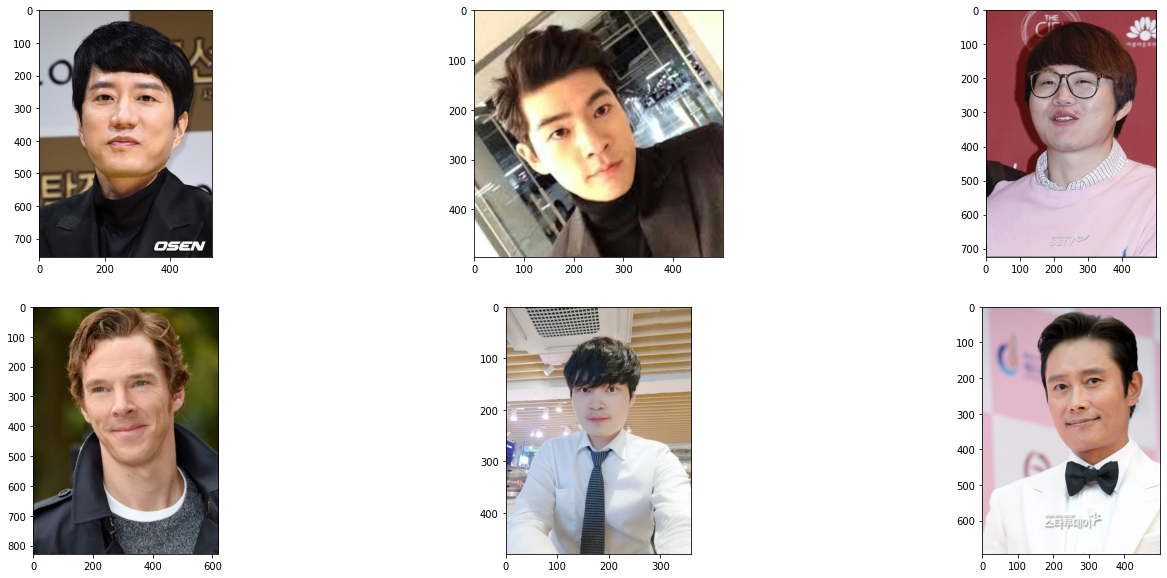

In [1]:
import os

dir_path = '/content/face2/'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

In [2]:
!bash

bash: cannot set terminal process group (76): Inappropriate ioctl for device
bash: no job control in this shell
/content# pip3 install face_recognition
     |████████████████████████████████| 100.1 MB 9.8 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=966a5473bb843f3ce3b5b6524f674eb18b7ecaa57f747f3fd9ce782cfcba6e91
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
/content# 
/content# 
/content# 
/content# exit


[(170, 419, 491, 98)]


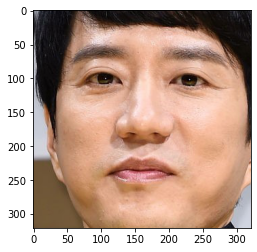

In [3]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = '/content/face2/kim.jpeg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [4]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

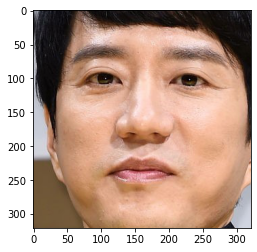

In [5]:
image_path = '/content/face2/kim.jpeg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [6]:
# 얼굴 임베딩 만들기 facenet

import os

dir_path = '/content/face2'
print(dir_path)
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

/content/face2
file_list: ['kim.jpeg', 'jang.jpeg', 'choi.jpeg', 'benedict.jpeg', 'seo.jpeg', 'lee.jpeg']


In [7]:
image_file = os.path.join(dir_path, 'kim.jpeg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.06931689,  0.04710519,  0.00163946, -0.02922795, -0.04534431,
        -0.01574747, -0.05351875, -0.14038035,  0.1702819 , -0.10470624,
         0.20723926,  0.02000151, -0.14000881, -0.04901914, -0.04499571,
         0.16772467, -0.14734532, -0.13491526, -0.09566346,  0.01987507,
         0.07181355,  0.03592939,  0.04086425,  0.06045597, -0.09311829,
        -0.29824919, -0.12957704, -0.03140466, -0.00053932, -0.02581046,
        -0.0736514 ,  0.04930003, -0.18673307, -0.04922866,  0.03196478,
         0.05044578, -0.00347061, -0.06565688,  0.18167391,  0.02741286,
        -0.21569386,  0.10307907,  0.06845276,  0.23322141,  0.23834112,
         0.03324878, -0.00724401, -0.15307701,  0.14344513, -0.11973225,
         0.02320271,  0.11707667,  0.10542025,  0.05879229,  0.02824302,
        -0.10826229,  0.04482851,  0.12948482, -0.08036956, -0.007783  ,
         0.0299903 , -0.04454796, -0.03563172, -0.10112944,  0.17317036,
         0.06607201, -0.06405112, -0.23355861,  0.1

In [8]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [9]:
embedding_dict = get_face_embedding_dict(dir_path)

In [10]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [11]:
# 가장 얼굴이 가까운 것을 순서대로
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [13]:
# obama와 가장 닮은 사람은 누굴까요?
import numpy as np
get_nearest_face('seo')

순위 1 : 이름(choi), 거리(0.4755758428102914)
순위 2 : 이름(jang), 거리(0.4866853203043946)
순위 3 : 이름(kim), 거리(0.5314130972997638)
순위 4 : 이름(lee), 거리(0.5374146295534661)
순위 5 : 이름(benedict), 거리(0.7995099310836402)


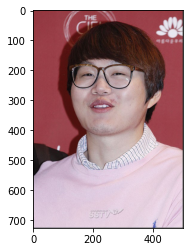

In [23]:
# 닮은 꼴 1위
image = img.imread(dir_path+'/'+ 'choi.jpeg')
plt.imshow(image)
plt.show()